# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |


## Configuration and procedure to run code

### Project and environment setup

1. Move to project directory "PROG8431" where you have cloned the project
2. Create virtual environment with name **"venvPROG8431"**
    - Make sure ```python --version``` is set to **12.3.6** in your system
    - ```python -m venv venvPROG8431```
3. Activate environment
    - ```.\venvPROG8431\Scripts\Activate.ps1```
    - In case you are using visual studio code, Choose the environment from menu as active environment
4. Install packages mentioned in **"requirements.txt"**
    - ```pip install -r requirements.txt```
5. Select **"venvPROG8431"** environment in your IDE
6. Create folder named **"Dataset"** in your project directory
7. Move all files downloaded from Kaggle dataset in the "Dataset" Directory
8. Open "Workshop1.ipynb" and run first program snippet. 
9. It should display top 5 rows from file "RAW_recipe.csv"


### Update Requirements.txt file once installing new packages

```pip freeze > requirements.txt```

### Import Packages

In [2]:
import pandas as pd
from scipy.stats import shapiro
import math
import numpy as np
import scipy.stats as zscore
import matplotlib.pyplot as plt


### Read data from source : RAW_recipe.csv

In [3]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")

    # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for name \r\n")
        if self.data is not None:
            counts = self.data["name"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["Recepe Name", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

    
if __name__ == "__main__":

    # Create an instance of the DataAnalytics class
    recepeData = RawRecipe()
    
    # Load data
    recepeData.load_data()

    # Check for missing values
    recepeData.check_null_values()

    recepeData.check_duplicate_values()

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 

---> STEP 2 : Null Check for data 

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

---> STEP 3 : Duplicate data Check for name 

                             Recepe Name  Count
0          cream cheese banana nut bread      3
1                cranberry orange relish      3
2          banana chocolate chip muffins      3
3             brown sugar glazed carrots      3
4     gluten free chocolate chip cookies      3
...                                  ...    ...
1425               zucchini cilantro dip      2
1426                 zucchini lime bread      2
1427                  zucchini oat bread      2
1428              zucchini sals

### Data Cleanup

1. Dataset contains "null" values in only "description" column which is not mandatory data which affects our analysis
2. There is 1 null value in "name" column that we will be eliminating while performing other operations
3. Duplicate check does not apply in Minutes, number of steps, nunber of ingrediants and ingrediants columns in dataset because it does not give any valuable insights
4. 1429 recepe names were repeated in dataset. This means we have multiple recepe to prepare one item.


### QQ Normal Plot


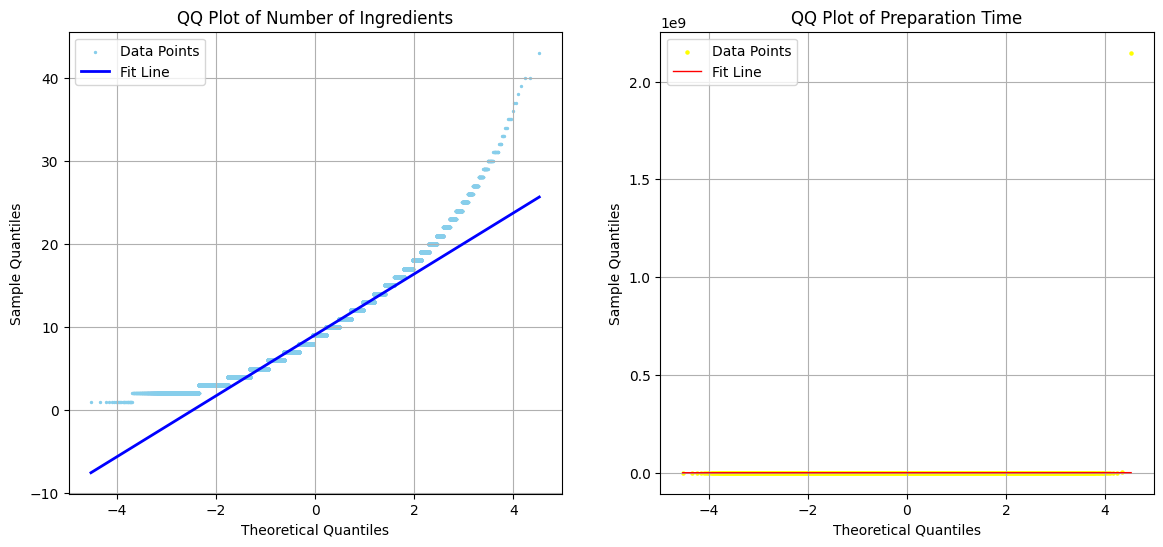

In [4]:
ingrediant_count = recepeData.data["n_ingredients"]  # Replace with your column
minutes_count = recepeData.data["minutes"]

def create_qq_plot(ax,data, title, line_color, line_width, point_color, point_size):
    (osm, osr), (slope, intercept, r) = zscore.probplot(data, dist="norm")
    
    # Plot the data points
    ax.scatter(osm, osr, color=point_color, s=point_size, label='Data Points')
    
    # Plot the fit line
    ax.plot(osm, slope * osm + intercept, color=line_color, lw=line_width, label='Fit Line')
    
    # Set title and labels for the subplot (ax)
    ax.set_title(f'QQ Plot of {title}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    
    # Add legend and grid
    ax.legend()
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# QQ Plot for Number of Ingredients
create_qq_plot(axes[0],ingrediant_count, 'Number of Ingredients',"blue",2,"skyblue",2)

# QQ Plot for Preparation Time
create_qq_plot(axes[1],minutes_count, 'Preparation Time',"red",1,"yellow",5)

#### Summary

1. Number of ingrediants : indicates middle portion of the data is is following normal destribution whereas recipes with more ingrediants creating skew 
2. Preperation time : The plot shows that data for prepation time is normaly destributed as data points are overlapping the fitline.

### Box Plot

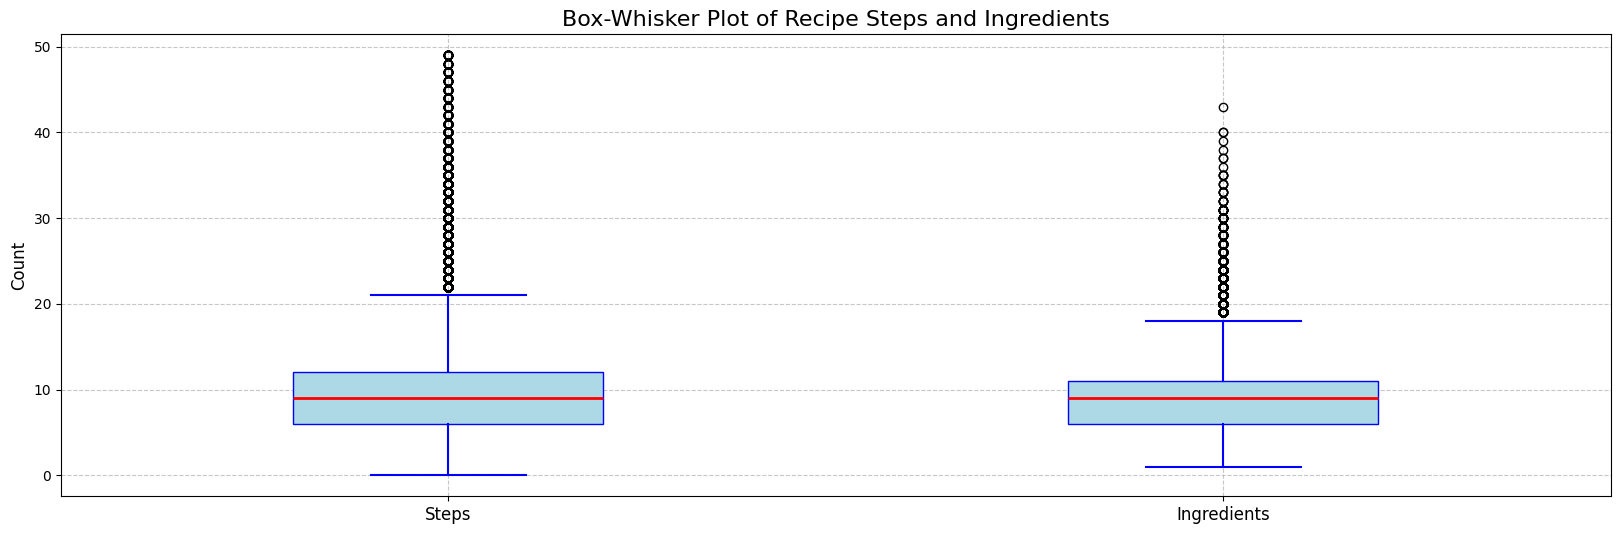

In [5]:
# Create a figure with a defined size
plt.figure(figsize=(20, 6))

# Create the box plot with customized labels and improved visuals
plt.boxplot(
    [recepeData.data[recepeData.data['n_steps'] < 50]['n_steps'], recepeData.data['n_ingredients']], 
    widths=0.4, 
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='blue', linewidth=1.5),
    capprops=dict(color='blue', linewidth=1.5)
)

# Customize the plot further
plt.title('Box-Whisker Plot of Recipe Steps and Ingredients', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks([1, 2], ['Steps', 'Ingredients'], fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Histogram

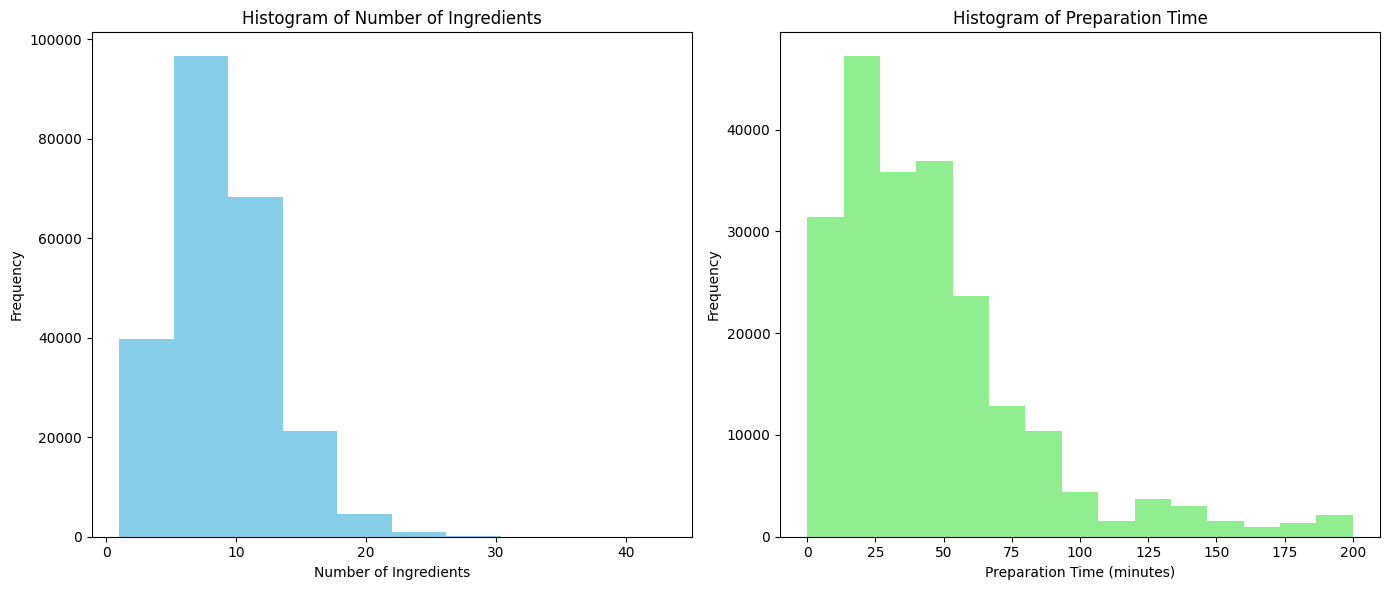

In [6]:
# Show plot side by side to show destribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram : Number of Ingredients
axes[0].hist(ingrediant_count,color='skyblue',histtype="stepfilled" )
axes[0].set_title('Histogram of Number of Ingredients')
axes[0].set_xlabel('Number of Ingredients')
axes[0].set_ylabel('Frequency')

# Histogram : Preparation Time
axes[1].hist(minutes_count, color='lightgreen',histtype="stepfilled",bins=15, range=(0,200))
axes[1].set_title('Histogram of Preparation Time')
axes[1].set_xlabel('Preparation Time (minutes)')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

### Z-Score

In [8]:
Zscore_steps = zscore.zscore(recepeData.data['n_steps'])
print(f"Z-Score for the steps\n ",Zscore_steps)

Z-Score for the steps
  0         0.205918
1        -0.127687
2        -0.628095
3         0.205918
4        -0.794897
            ...   
231632   -0.461292
231633   -1.462107
231634   -0.461292
231635   -0.127687
231636   -0.794897
Name: n_steps, Length: 231637, dtype: float64


#### Summary
The Z-score expresses the number of standard deviations (n_steps) that a particular number of steps deviates from the dataset mean. To determine if n_steps is above or below average for the dataset, subtract the mean from n_steps and divide the result by the standard deviation.

### T-score

In [9]:
sample_mean = recepeData.data['n_steps'].mean()
sample_std = recepeData.data['n_steps'].std()
n = len(recepeData.data['n_steps'])

# Specify the population mean (change as necessary)
population_mean = 0  # Update this to your population mean

# Calculate the t-score
t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

print(f"T-score for {'n_steps'}: {t_score}")

T-score for n_steps: 783.9709415505705


#### Summary
A statistical tool called the t-score can be used to calculate the standard deviation of the difference between a sample mean and the population mean. It is utilized in hypothesis testing, particularly in cases when the sample size is small or the population standard deviation is unknown, to ascertain whether the differences between groups are significant.

### Shapiro-Wilk Normality Test

In [18]:
from scipy import stats

#data.columns = ['name', 'id', 'minutes', 'contributor_id', 'tags', 'nutrition', 'steps', 'submitted', 'n_steps', 'description', 'ingredients', 'n_ingredients']

# Select only numeric columns for the Shapiro-Wilk test
numeric_columns = recepeData.data.select_dtypes(include='number').columns

# Apply the Shapiro-Wilk test for normality on each numeric column
shapiro_results = {}

for column in numeric_columns:
    statistic, p_value = stats.shapiro(recepeData.data['n_steps'].dropna())  # Use dropna() to remove NaN values
    shapiro_results['n_steps'] = p_value

# Convert results to DataFrame for better visualization
shapiro_results_df = pd.DataFrame(list(shapiro_results.items()), columns=['n_stpes', 'p_value'])

# Display the Shapiro-Wilk test results
print(shapiro_results_df)

   n_stpes        p_value
0  n_steps  7.208515e-138


c:\Users\ADMIN\Documents\data analysis\PROG8431\PROG8431\venvPROG8431\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 231637.
  res = hypotest_fun_out(*samples, **kwds)


#### Summary

he code below performs the Shapiro-Wilk test for normality on the numerical columns of a recipe dataset. This script automatically excludes non-numerical columns and handles the missing values. Very low p-values for all numerical columns are obtained; thus, data is far from a normal distribution. Besides, there is a warning because of large sample size, N > 5000